<a href="https://colab.research.google.com/github/ethereins/DIF62130_B_25_2311532016/blob/main/PRAKTIKUM2ML/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = '/content/drive/MyDrive/Datasets/diabetes.csv'
df = pd.read_csv(file_path)

atau bisa dengan cara ini:

In [10]:
dataset_url = 'https://raw.githubusercontent.com/ethereins/DIF62130_B_25_2311532016/refs/heads/main/Datasets/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

**Selecting features**


We need to divide the given columns into two types of variables: variable dependent (target variable) and independent variable (feature variable).

In [15]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df.Outcome

In [16]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


**Splitting data**

Bagi data dengan function train_test_split()
Kita perlu melewati 3 parameter: features, target. test_set size
Data training 70%, data testing 30%

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

**Pengembangan model dan prediksi**

1. Import modul LogisticRegression
2. Buat LogisticRegression classifier object dengan LogisticRegression function()
3. Fit ur model on the train set using fit() and perform prediction on the test using predict()

Jadi, data akan belajar dari X_train dan y_train, misal belajar memahami pola, dll.



In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

**Evaluasi dengan confusion matrix**

Tabel untuk mengevaluasi kinerja model dengan membandingkan prediksi model dengan nilai sebenarnya.
1. TRUE POSITIVE (+,+)
2. TRUE NEGATIVE (+,-)
3. FALSE POSITIVE (-,+)
4. FALSE NEGATIVE (-,-)



In [23]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[135,  12],
       [ 36,  48]])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

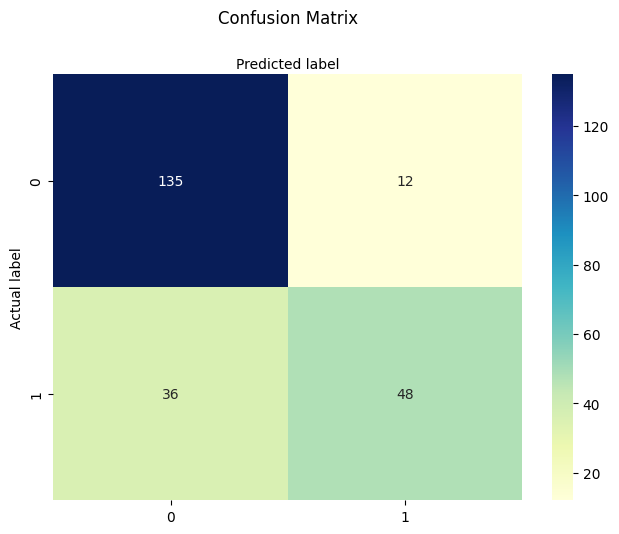

In [26]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matrix evaluation metrics

1. Akurasi = (TP + TN) / (TP + FP + FN + FN)
2. Presisi = TP / TP + FP
Seberapa banyak prediksi positif yang benar.
3. Recall = TP / TP + FN
Seberapa baik model menangkap semua kasus positif (khususnya untuk diagnosa penyakit).
4. F1-Score = 2*((presisi.recall)/(presisi+recall))
Rata-rata harmonisasi presisi dan recall.
5. Spesificity = TN / TN + FP
Menghindari FP.

In [27]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.92      0.85       147
   with diabetes       0.80      0.57      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.74      0.76       231
    weighted avg       0.79      0.79      0.78       231



KURVA ROC

Grafik untuk mengevaluasi model klasifikasi, terutama binary classification. Berguna jika ingin melihat model FN dan FPnya. Menunjukkan keseimbangan True Positive Rate dan False Positive Rate di berbagai ambang batas (threshold). Yang bagus adalah yang mendekati pojok atas, jadinya makin banyak TP dan sedikit FP.

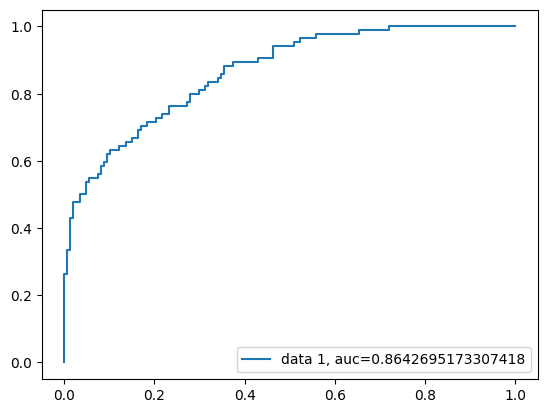

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc=' + str(auc))
plt.legend(loc=4)
plt.show()

AUC = area under curve, mengukur seberapa baik model membedakan kelas positif dan negatif. Semakin mendekati 1, maka model semakin baik.